# Israel Vs Palestine Fatilities from Year 2000 to 2023

# Library Import



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import folium


C:\Users\SHEKHAR\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Import



In [2]:
df = pd.read_csv("fatalities_isr_pse_conflict_2000_to_2023.csv")


# Data Analyse



In [3]:
df.head()


,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [5]:
df.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


The average age of the dead is 26, and the oldest person was 112 years old. On the other hand, the youngest individual counted among the dead is a baby who was only 1 year old

#  Drop "notes" column



In [6]:
df.drop("notes", inplace=True, axis=1)


# Dealing with NaN values



In [7]:
df['age'].fillna(df['age'].mean(), inplace=True)


In [8]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)


In [9]:
df.dropna(subset=['took_part_in_the_hostilities'], inplace=True)


In [10]:
df['place_of_residence'].fillna('Unknown', inplace=True)
df['place_of_residence_district'].fillna('Unknown', inplace=True)


In [11]:
df['type_of_injury'].fillna('Not Specified', inplace=True)
df['ammunition'].fillna('Not Specified', inplace=True)


In [12]:
print(df.isnull().sum())


name                            0
date_of_event                   0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
date_of_death                   0
gender                          0
took_part_in_the_hostilities    0
place_of_residence              0
place_of_residence_district     0
type_of_injury                  0
ammunition                      0
killed_by                       0
dtype: int64


# Convert date columns to pandas datetime



In [13]:
df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

# Age Distribution of Fatalities

# The occupation army targets civilians, including innocent children, women and defenseless youth


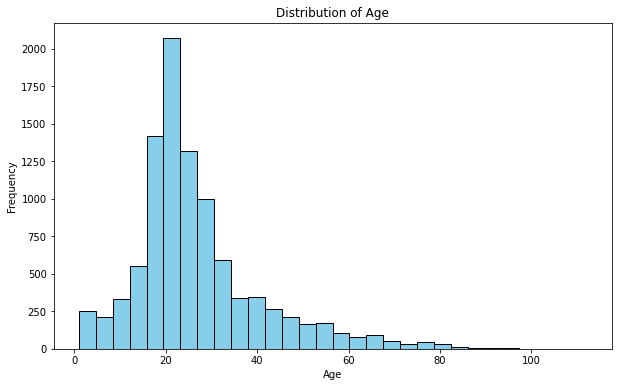

In [14]:
# Plot a histogram for the 'age' column
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



Explaining the figures:

The graphs above show the distribution by age of individuals killed between Israelis and Palestinians.

We can see that the majority of those killed are young people between the ages of 15 and 30. Young children are also among the fatalities and there is a decline with increasing age.

The data shows that young people and children are the biggest victims of fatalities.

# Gender Distribution of Fatalities¶


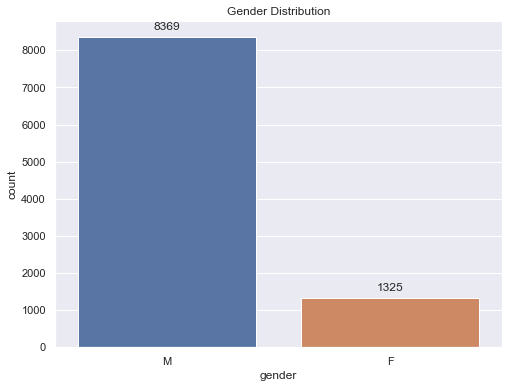

In [15]:
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")  # Set the style, if desired

# Plot the countplot
ax = sns.countplot(x='gender', data=df)

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Gender Distribution')
plt.show()


# Distribution of Fatalities by Citizenship




In [16]:
citizenship_counts = df['citizenship'].value_counts()


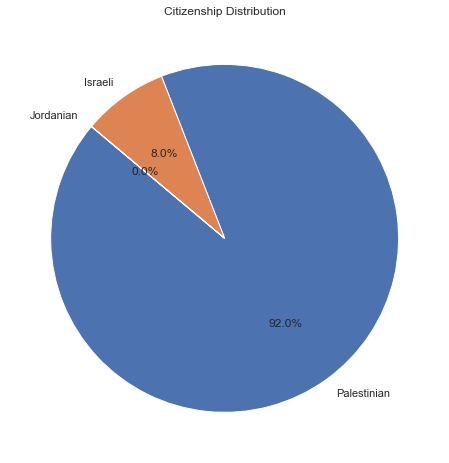

In [17]:
# Pie Chart for Citizenship Distribution
plt.figure(figsize=(8, 8))
plt.pie(citizenship_counts, labels=citizenship_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Citizenship Distribution')
plt.show()

- We can see that the majority of the dead are Palestinians, representing 92% of the total dead.

# Fatality Trends from 2000 to 2023

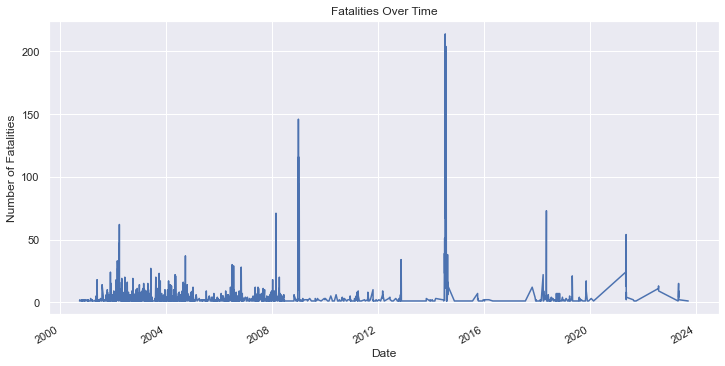

In [18]:
# Group by date and count the number of fatalities
fatalities_over_time = df.groupby('date_of_event').size()

# Create a time series plot
plt.figure(figsize=(12, 6))
fatalities_over_time.plot()
plt.title('Fatalities Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fatalities')
plt.show()

# Distribution of Fatalities by District


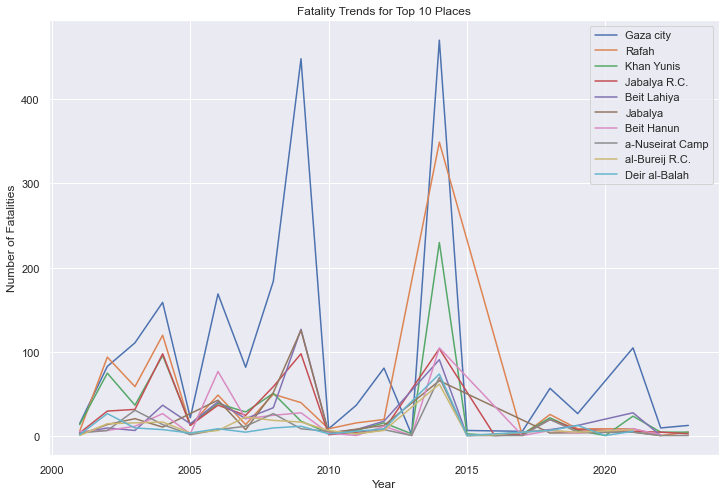

In [19]:
df['year'] = df['date_of_event'].dt.year

# Choose the top N places to focus on
top_n_places = 10  # You can adjust this number as needed

# Get the top N places with the highest total fatalities
top_places = df['place_of_residence'].value_counts().nlargest(top_n_places).index

# Filter the data to include only the top N places
filtered_data = df[df['place_of_residence'].isin(top_places)]

# Group by place and year, and sum the number of fatalities
fatalities_by_place = filtered_data.groupby(['place_of_residence', 'year']).size().reset_index(name='fatalities_count')

# Create a line plot for each place
plt.figure(figsize=(12, 8))

for place in top_places:
    data = fatalities_by_place[fatalities_by_place['place_of_residence'] == place]
    plt.plot(data['year'], data['fatalities_count'], label=place)

plt.title(f'Fatality Trends for Top {top_n_places} Places')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.legend()
plt.show()


In [20]:
# Redefining the approximate coordinates for major districts
district_coords = {
    'Gaza': [31.5, 34.466667],
    'Hebron': [31.532569, 35.095388],
    'Jenin': [32.457336, 35.286865],
    'Nablus': [32.221481, 35.254417],
    'Ramallah': [31.902922, 35.206209],
    'Bethlehem': [31.705791, 35.200657],
    'Tulkarm': [32.308628, 35.028537],
    'Jericho': [31.857163, 35.444362],
    'Rafah': [31.296866, 34.245536],
    'Khan Yunis': [31.346201, 34.306286]
}

# Get fatality counts for each district
district_fatalities = df.groupby('event_location_district').size()

# Function to determine the color of the circle based on the number of fatalities
def get_color(fatalities):
    if fatalities > 500:
        return 'darkred'
    elif fatalities > 100:
        return 'red'
    elif fatalities > 50:
        return 'orange'
    else:
        return 'green'

# Create a base map centered around the region
m = folium.Map(location=[31.5, 34.75], zoom_start=8, tiles='OpenStreetMap')

# Add markers and circles for districts
for district, coords in district_coords.items():
    fatalities = district_fatalities.get(district, 0)
    folium.Marker(
        location=coords,
        tooltip=f'{district}: {fatalities} fatalities',
        icon=None
    ).add_to(m)
    folium.Circle(
        location=coords,
        radius=np.sqrt(fatalities) * 1000,  # scale radius for better visualization
        color=get_color(fatalities),
        fill=True,
        fill_color=get_color(fatalities),
        fill_opacity=0.6,
    ).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

m

#  Distribution of Place of Residence

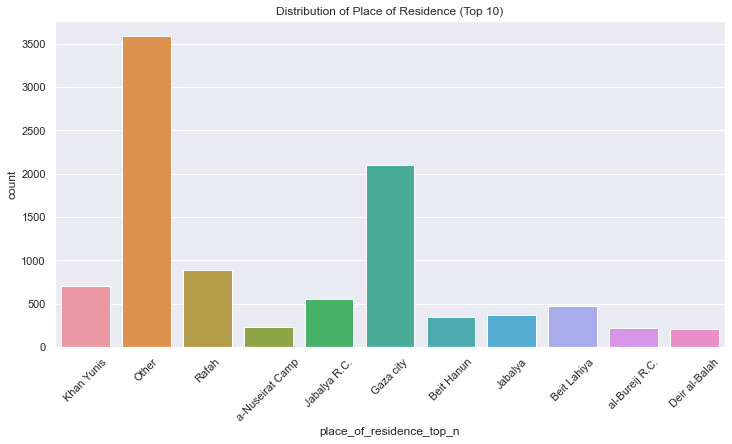

In [21]:
# Categorical Analysis - Place of Residence (Top N)
top_n = 10  # Set the number of top categories to display

# Get the top N categories
top_n_categories = df['place_of_residence'].value_counts().nlargest(top_n).index

# Replace less frequent categories with 'Other'
df['place_of_residence_top_n'] = df['place_of_residence'].apply(lambda x: x if x in top_n_categories else 'Other')

plt.figure(figsize=(12, 6))
sns.countplot(x='place_of_residence_top_n', data=df)
plt.title('Distribution of Place of Residence (Top {})'.format(top_n))
plt.xticks(rotation=45)
plt.show()


# Distribution Based on Participation in Hostilities¶


In [22]:
# Count the number of occurrences for each category in 'took_part_in_the_hostilities'
participation_counts = df['took_part_in_the_hostilities'].value_counts()
participation_counts

No                            4653
Yes                           3467
Israelis                       771
Unknown                        603
Object of targeted killing     200
Name: took_part_in_the_hostilities, dtype: int64

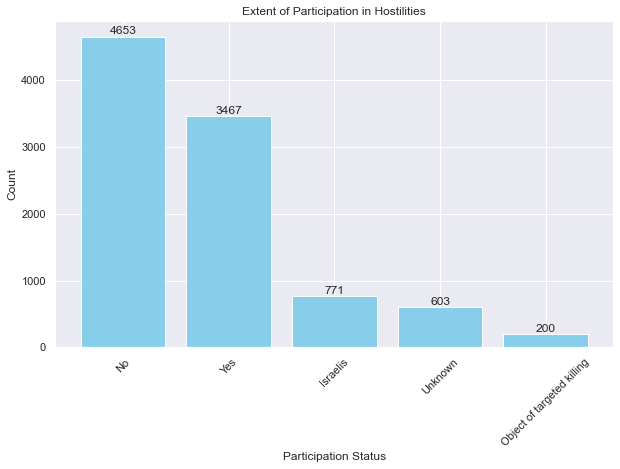

In [23]:
# Create a bar plot to visualize the extent of participation
plt.figure(figsize=(10, 6))
plt.bar(participation_counts.index, participation_counts.values, color='skyblue')

for i, count in enumerate(participation_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

plt.title('Extent of Participation in Hostilities')
plt.xlabel('Participation Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


- The graph shows that the majority of the dead had no participation in the hostilities, accounting for 48 per cent of the total dead.

- Next, we can see that 36 per cent of the dead took part in the hostilities.

- 6 per cent are not known, 8 per cent were killed by the Israelis, while 2 per cent of the dead were targeted.

# Distribution of Types of Injuries

In [24]:
# Count the occurrences of each type of injury
injury_counts = df['type_of_injury'].value_counts()
print(injury_counts)


gunfire             8785
explosion            505
Not Specified        280
shelling              65
house demolition      25
stabbing              18
beating                7
stones throwing        4
hit by a vehicle       4
fire                   1
Name: type_of_injury, dtype: int64


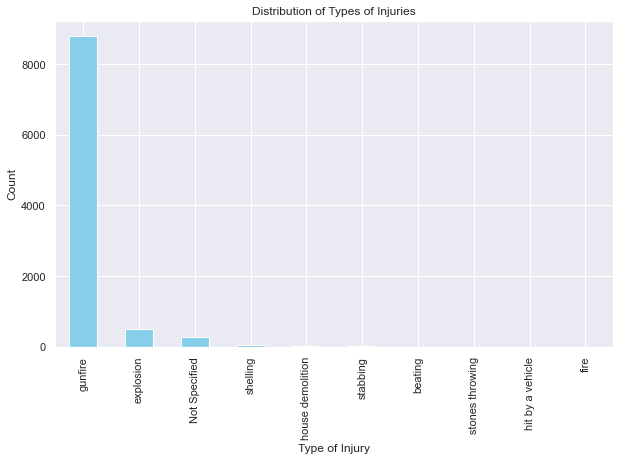

In [25]:
plt.figure(figsize=(10, 6))
injury_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Types of Injuries')
plt.xlabel('Type of Injury')
plt.ylabel('Count')
plt.show()


- The graph shows that 91 per cent of deaths were by firearm.

- We can also see deaths by explosion account for 5% of the total deaths recorded

# Type of ammunition and means of killing

In [26]:
# Count the occurrences of each type of ammunition and means of killing
ammunition_counts = df['ammunition'].value_counts()
means_of_killing_counts = df['killed_by'].value_counts()

print("Ammunition used:")
print(ammunition_counts)

print("\nMeans of killing:")
print(means_of_killing_counts)


Ammunition used:
Not Specified                  4888
missile                        2847
shell                           675
live ammunition                 606
explosive belt                  315
bomb                            213
mortar fire                      43
flechette shells                 22
phosphorus shell                 16
car bomb                         15
knife                            14
rubber-coated metal bullets      13
teargas canister                 11
Qassam rocket                     7
grad rocket                       5
grenade                           2
flare bomb                        1
stun grenade                      1
Name: ammunition, dtype: int64

Means of killing:
Israeli security forces    8876
Palestinian civilians       771
Israeli civilians            47
Name: killed_by, dtype: int64


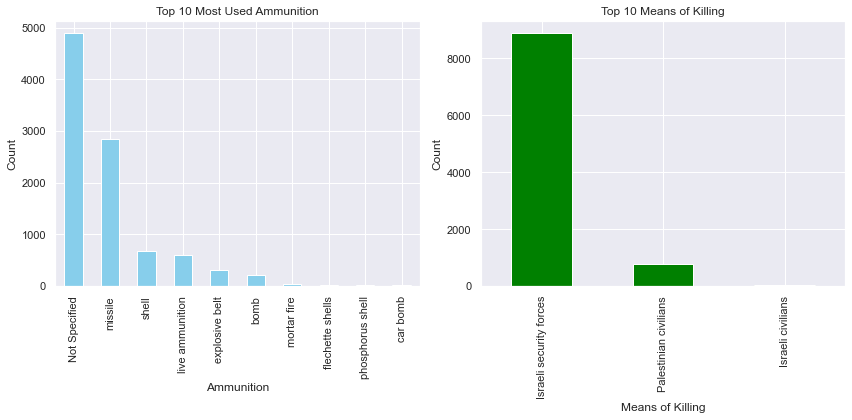

In [27]:
plt.figure(figsize=(12, 6))

# Plot ammunition
plt.subplot(1, 2, 1)
ammunition_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Used Ammunition')
plt.xlabel('Ammunition')
plt.ylabel('Count')

# Plot means of killing
plt.subplot(1, 2, 2)
means_of_killing_counts.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Means of Killing')
plt.xlabel('Means of Killing')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# Victim Profiles:
- profiles of the victims based on the available data such as age, gender, citizenship, and place of residence.


In [28]:
# Generate victim profiles based on age, gender, citizenship, and place of residence
victim_profiles = df[['age', 'gender', 'citizenship', 'place_of_residence']].copy()

# Display the first few rows of victim profiles
print(victim_profiles.head())


     age gender  citizenship place_of_residence
6   24.0      M  Palestinian         Khan Yunis
94  51.0      M  Palestinian      a-Shati' Camp
95  33.0      M  Palestinian      a-Shati' Camp
96  49.0      M  Palestinian         Khan Yunis
98  25.0      M  Palestinian              Rafah


In [29]:
# Analyze common characteristics
common_age_range = victim_profiles['age'].value_counts().idxmax()
common_gender = victim_profiles['gender'].value_counts().idxmax()
common_citizenship = victim_profiles['citizenship'].value_counts().idxmax()
common_place_of_residence = victim_profiles['place_of_residence'].value_counts().idxmax()

print(f"\nCommon Characteristics Among Victims:")
print(f"Most Common Age Range: {common_age_range}")
print(f"Most Common Gender: {common_gender}")
print(f"Most Common Citizenship: {common_citizenship}")
print(f"Most Common Place of Residence: {common_place_of_residence}")



Common Characteristics Among Victims:
Most Common Age Range: 22.0
Most Common Gender: M
Most Common Citizenship: Palestinian
Most Common Place of Residence: Gaza city


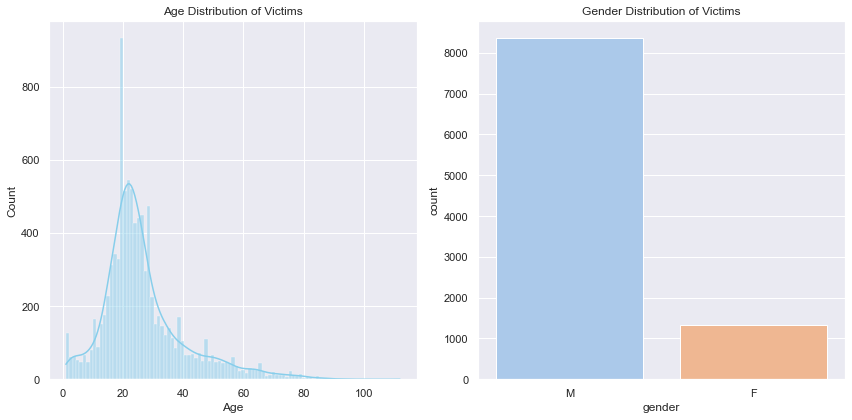

In [30]:
plt.figure(figsize=(12, 6))

# Plot Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(victim_profiles['age'], kde=True, color='skyblue')
plt.title('Age Distribution of Victims')
plt.xlabel('Age')

# Plot Gender Distribution
plt.subplot(1, 2, 2)
sns.countplot(x='gender', data=victim_profiles, palette='pastel')
plt.title('Gender Distribution of Victims')

plt.tight_layout()
plt.show()


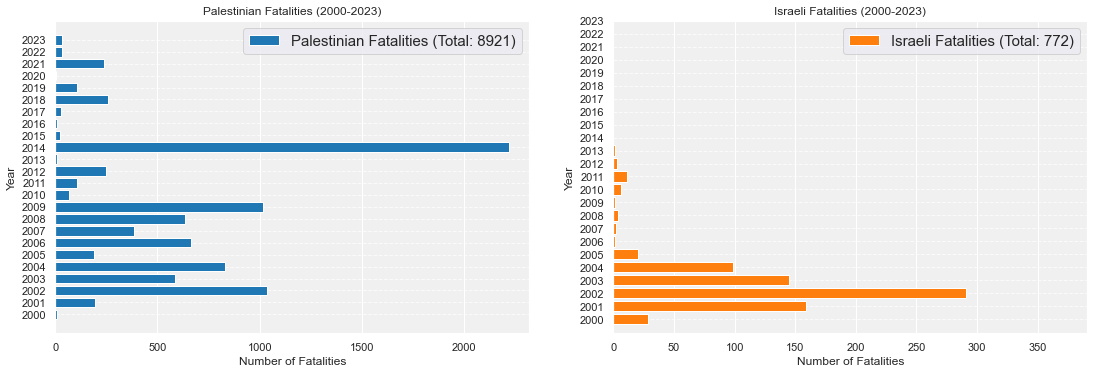

In [31]:
import matplotlib.pyplot as plt

# Create subplots with enhanced styling
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Define custom colors
palestinian_color = '#1f77b4'  # Blue color for Palestinian chart
israeli_color = '#ff7f0e'      # Orange color for Israeli chart
total_text_color = '#2ca02c'  # Green color for total text

# Plot for Palestinian fatalities
palestinian_data = df[df['citizenship'] == 'Palestinian']

palestinian_fatalities_per_year = palestinian_data.groupby(palestinian_data['date_of_event'].dt.year)['name'].count()
axes[0].barh(palestinian_fatalities_per_year.index, palestinian_fatalities_per_year.values, color=palestinian_color)
axes[0].set_xlim(0, max(palestinian_fatalities_per_year.values) + 100)  # Adjust the x-limit
axes[0].set_xlabel('Number of Fatalities')
axes[0].set_ylabel('Year')
axes[0].set_title('Palestinian Fatalities (2000-2023)')

# Plot for Israeli fatalities
israeli_data = df[df['citizenship'] == 'Israeli']

israeli_fatalities_per_year = israeli_data.groupby(israeli_data['date_of_event'].dt.year)['name'].count()
axes[1].barh(israeli_fatalities_per_year.index, israeli_fatalities_per_year.values, color=israeli_color)
axes[1].set_xlim(0, max(israeli_fatalities_per_year.values) + 100)  # Set x-axis limits from 0 to max fatalities
axes[1].set_xlabel('Number of Fatalities')
axes[1].set_ylabel('Year')
axes[1].set_title('Israeli Fatalities (2000-2023)')

# Set y-axis labels with years
years = range(2000, 2024)
axes[0].set_yticks(years)
axes[0].set_yticklabels([str(year) for year in years])
axes[1].set_yticks(years)
axes[1].set_yticklabels([str(year) for year in years])

# Add a legend with total number of Palestinian fatalities
total_palestinian_fatalities = palestinian_fatalities_per_year.sum()
axes[0].legend(['Palestinian Fatalities (Total: {})'.format(total_palestinian_fatalities)], loc='upper right', fontsize=15)

# Add a legend with total number of Israeli fatalities
total_israeli_fatalities = israeli_fatalities_per_year.sum()
axes[1].legend(['Israeli Fatalities (Total: {})'.format(total_israeli_fatalities)], loc='upper right', fontsize=15)

# Add a horizontal grid for better readability
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add a background color to the plots for better contrast
axes[0].set_facecolor('#f0f0f0')
axes[1].set_facecolor('#f0f0f0')

# Adjust layout and spacing
plt.tight_layout(pad=3)

# Show the plot
plt.show()


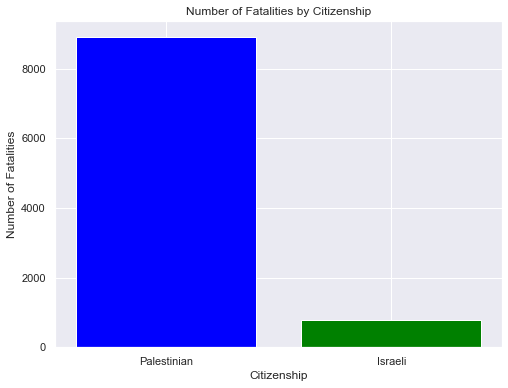

In [32]:
# Filter data for Palestinian and Israeli citizenship
palestinian_fatalities = df[df['citizenship'] == 'Palestinian']['name'].count()
israeli_fatalities = df[df['citizenship'] == 'Israeli']['name'].count()

# Create a bar chart
citizenship = ['Palestinian', 'Israeli']
fatalities = [palestinian_fatalities, israeli_fatalities]

plt.figure(figsize=(8, 6))
plt.bar(citizenship, fatalities, color=['blue', 'green']) #This number of Palestinian martyrs doubled in the period from 7/10/2023 until the issuance of this notebook
plt.title('Number of Fatalities by Citizenship')
plt.xlabel('Citizenship')
plt.ylabel('Number of Fatalities')
plt.show()


### Conclusion :

We can see that, around 8500 Palestanian citizens are dead over the course of 23 years while lesss than 500 israeli citizens had to lose thier life beacuse of the conflict going on between Palestine and Israel.